# Basket Market Analysis Using `Apriori`

#### Importing libraries

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

#### Dataset

In [4]:
# Dataset
data = {
    'Transaction': list(range(101, 131)),
    'Items': [['bread', 'milk', 'eggs'],
              ['bread', 'diapers', 'beer', 'eggs'],
              ['milk', 'diapers', 'beer', 'cola'],
              ['bread', 'milk', 'diapers', 'beer', 'cola'],
              ['bread', 'milk', 'diapers', 'beer'],
              ['bread', 'milk', 'diapers'],
              ['bread', 'milk', 'beer'],
              ['bread', 'diapers', 'beer'],
              ['milk', 'diapers', 'beer'],
              ['bread', 'milk', 'diapers', 'beer'],
              ['bread', 'milk', 'diapers'],
              ['bread', 'milk', 'beer'],
              ['bread', 'diapers', 'beer'],
              ['milk', 'diapers', 'beer'],
              ['bread', 'milk', 'diapers', 'beer'],
              ['bread', 'milk', 'eggs'],
              ['bread', 'diapers', 'beer', 'eggs'],
              ['milk', 'diapers', 'beer', 'cola'],
              ['bread', 'milk', 'diapers', 'beer', 'cola'],
              ['bread', 'milk', 'diapers', 'beer'],
              ['bread', 'milk', 'diapers'],
              ['bread', 'milk', 'beer'],
              ['bread', 'diapers', 'beer'],
              ['milk', 'diapers', 'beer'],
              ['bread', 'milk', 'diapers', 'beer'],
              ['bread', 'milk', 'diapers'],
              ['bread', 'milk', 'beer'],
              ['bread', 'diapers', 'beer'],
              ['milk', 'diapers', 'beer'],
              ['bread', 'milk', 'diapers', 'beer']]
}
df = pd.DataFrame(data)
df

d:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transaction                               Items
0           101                 [bread, milk, eggs]
1           102        [bread, diapers, beer, eggs]
2           103         [milk, diapers, beer, cola]
3           104  [bread, milk, diapers, beer, cola]
4           105        [bread, milk, diapers, beer]
5           106              [bread, milk, diapers]
6           107                 [bread, milk, beer]
7           108              [bread, diapers, beer]
8           109               [milk, diapers, beer]
9           110        [bread, milk, diapers, beer]
10          111              [bread, milk, diapers]
11          112                 [bread, milk, beer]
12          113              [bread, diapers, beer]
13          114               [milk, diapers, beer]
14          115        [bread, milk, diapers, beer]
15          116                 [bread, milk, eggs]
16          117        [bread, diapers, beer, eggs]
17          118         [milk, diapers, beer, cola]
18          119  [bread, milk, diapers, beer, cola]
19          120        [bread, milk, diapers, beer]
20          121              [bread, milk, diapers]
21          122                 [bread, milk, beer]
22          123              [bread, diapers, beer]
23          124               [milk, diapers, beer]
24          125        [bread, milk, diapers, beer]
25          126              [bread, milk, diapers]
26          127                 [bread, milk, beer]
27          128              [bread, diapers, beer]
28          129               [milk, diapers, beer]
29          130        [bread, milk, diapers, beer]

#### Convert dataset into one-hot encoded format

In [10]:
# Convert dataset into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(df['Items']).transform(df['Items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_
                          )

d:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Apply Apriori algorithm & generating rules

In [11]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)

# Generate association rules
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

d:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Plotting frequent itemsets

d:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


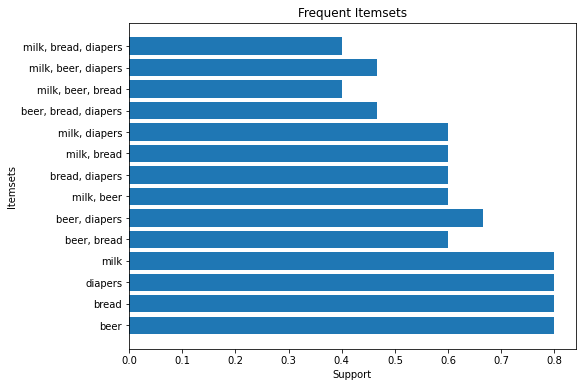

In [12]:

# Plotting frequent itemsets
plt.figure(figsize=(8, 6))
plt.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], align='center')
plt.yticks(range(len(frequent_itemsets)), frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x)))
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()

#### Plotting association rules

d:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


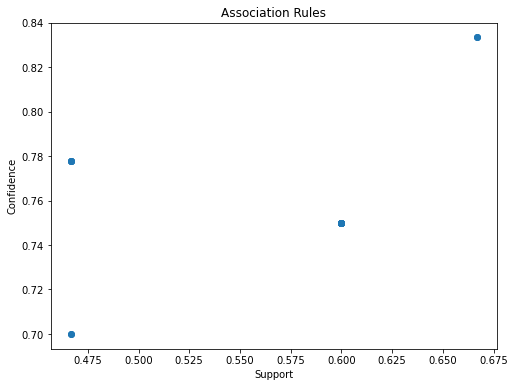

In [15]:
# Plotting association rules
plt.figure(figsize=(8, 6))
plt.scatter(association_rules['support'], association_rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()